#### Exam description
For this exam, you will predict the target values for the test.csv. 

#### Your task:
find a good machine learning model to predict the class (last column). Then predict the class of the instances in the test.csv. 

#### Dataset description:
This database contains 279 attributes, 206 of which are linear valued, and the rest are nominal. The aim is to distinguish between the presence and absence of cardiac arrhythmia and to classify it in one of the 16 groups. Class 01 refers to 'normal' ECG classes 02 to 15 refers to different classes of arrhythmia, and class 16 refers to the rest of unclassified ones.

#### Exam rules
- You can use only the machine learning models discussed in this course. 
    - If the prediction is based on a model that is not discussed in class, one of the models in your submission will randomly be selected for grading. 
- Fifty percent of the grade is based on your Python code submission. The other 50 percent of your grade is based on the evaluation score of the prediction. 
- The final prediction is evaluated using the **macro precision** function. 
- The exam should be syntax error-free. Run your code before the final submission. 
- Save the final prediction as ``final_test_prediction``. 

#### Devliverable
Submit the iPython notebook or the .py file of your work.

#### Rubric
| Descriptio | Fair | Good | excelent |
|:-----------|:------|:------|:----------|
|Preprocessing|Demonstrate limited understanding of preprocessing steps | Demonstrate a moderate ability to find a way to apply the preprocessing step to prepare the dataset for Machine learning models | Demonstrate the ability to choose the appropriate preprocessing model to prepare the dataset |
|Machine learning model | Demonstrate limited understanding of methods used to train machine learning models | Demonstrate the ability to understand techniques used to train machine learning models with some effectiveness. This includes optimization algorithms, initialization, regularization, and hyperparameter search methods | Demonstrate ability to understand and apply various algorithms as well as initialization, regularization, and hyperparameter search methods |
|Final prediction |Demonstrate limited understanding of strategies to structure and end to end machine learning project | Demonstrate ability to understand classic ML strategies such as error analysis, data split, data collection and evaluation metric selection with some effectiveness | Demonstrates ability to structure the project and apply methods such as error analysis, data split, data collection, design a labeling process and select proper evaluation metrics to improve performance. 

#### Attribute Information:

Complete attribute documentation:
- 1 Age: Age in years , linear
- 2 Sex: Sex (0 = male; 1 = female) , nominal
- 3 Height: Height in centimeters , linear
- 4 Weight: Weight in kilograms , linear
- 5 QRS duration: Average of QRS duration in msec., linear
- 6 P-R interval: Average duration between onset of P and Q waves in msec., linear
- 7 Q-T interval: Average duration between onset of Q and offset of T waves in msec., linear
- 8 T interval: Average duration of T wave in msec., linear
- 9 P interval: Average duration of P wave in msec., linear
Vector angles in degrees on front plane of:, linear<br>
- 10 QRS
- 11 T
- 12 P
- 13 QRST
- 14 J

- 15 Heart rate: Number of heart beats per minute ,linear

Of channel DI:<br>
Average width, in msec., of: linear

- 16 Q wave
- 17 R wave
- 18 S wave
- 19 R' wave, small peak just after R
- 20 S' wave

- 21 Number of intrinsic deflections, linear
- 22 Existence of ragged R wave, nominal
- 23 Existence of diphasic derivation of R wave, nominal
- 24 Existence of ragged P wave, nominal
- 25 Existence of diphasic derivation of P wave, nominal
- 26 Existence of ragged T wave, nominal
- 27 Existence of diphasic derivation of T wave, nominal

Of channel DII:

- 28 .. 39 (similar to 16 .. 27 of channel DI)

Of channels DIII:

- 40 .. 51

Of channel AVR:

- 52 .. 63

Of channel AVL:

- 64 .. 75

Of channel AVF:

- 76 .. 87

Of channel V1:

- 88 .. 99

Of channel V2:

- 100 .. 111

Of channel V3:

- 112 .. 123

Of channel V4:

- 124 .. 135

Of channel V5:

- 136 .. 147

Of channel V6:

- 148 .. 159

Of channel DI:<br>
Amplitude , * 0.1 milivolt, of
- 160 JJ wave, linear
- 161 Q wave, linear
- 162 R wave, linear
- 163 S wave, linear
- 164 R' wave, linear
- 165 S' wave, linear
- 166 P wave, linear
- 167 T wave, linear

168 QRSA , Sum of areas of all segments divided by 10, ( Area= width * height / 2 ), linear
169 QRSTA = QRSA + 0.5 * width of T wave * 0.1 * height of T wave. (If T is diphasic then the bigger segment is considered), linear

Of channel DII:

- 170 .. 179

Of channel DIII:

- 180 .. 189

Of channel AVR:

- 190 .. 199

Of channel AVL:

- 200 .. 209

Of channel AVF:

- 210 .. 219

Of channel V1:

- 220 .. 229

Of channel V2:

- 230 .. 239

Of channel V3:

- 240 .. 249

Of channel V4:

- 250 .. 259

Of channel V5:

- 260 .. 269

Of channel V6:

- 270 .. 279

In [1]:
#importing the libraries - classification problem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections


import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the values from the test and train dataset
data1 = pd.read_csv("train.csv")
data2 = pd.read_csv("test.csv")

In [3]:
#displaying max rows, columns, width
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# Analyzing the training dataset - data1 

In [4]:
#checking the head of train dataset
data1.head()

Unnamed: 0  age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
0         124   37    1     159      56           75         162          339   
1          54   52    0     165      80           88         202          369   
2         298   12    1     165      47           91           0          359   
3         311   80    0     160      70           90         201          404   
4         230   72    0     171      74           77         172          330   

   Tinterval  Pinterval  QRS    T   P QRST  J heartrate  chDI_Qwave  \
0        141         96   60   58  73   56  ?        81           0   
1        113         97   58   79   ?   62  ?        59          16   
2        152          0    8   14   ?   10  ?        68          20   
3        157        111   21  -13  39   12  ?        67           0   
4        140        104   33   42  51   36  ?        84           0   

   chDI_Rwave  chDI_Swave  chDI_RPwave  chDI_SPwave  \
0          36          44            0            0   
1          44          40            0            0   
2          84           0            0            0   
3          44          40            0            0   
4          52          32            0            0   

   chDI_intrinsicReflecttions  chDI_RRwaveExists  chDI_DD_RRwaveExists  \
0                          20                  0                     0   
1                          36                  0                     0   
2                          40                  0                     0   
3                          24                  0                     0   
4                          28                  0                     0   

   chDI_RPwaveExists  chDI_DD_RPwaveExists  chDI_RTwaveExists  \
0                  0                     0                  0   
1                  0                     0                  0   
2                  0                     0                  0   
3                  0                     0                  0   
4                  0                     0                  0   

   chDI_DD_RTwaveExists  chDII_Qwave  chDII_Rwave  chDII_Swave  chDII_RPwave  \
0                     0            0           40           40             0   
1                     0            0           80            0             0   
2                     0            0           52           48             0   
3                     0            0           72            0             0   
4                     0            0           68            0             0   

   chDII_SPwave  chDII_intrinsicReflecttions  chDII_RRwaveExists  \
0             0                           24                   0   
1             0                           28                   0   
2             0                           32                   0   
3             0                           28                   0   
4             0                           36                   0   

   chDII_DD_RRwaveExists  chDII_RPwaveExists  chDII_DD_RPwaveExists  \
0                      0                   0                      0   
1                      1                   0                      0   
2                      0                   0                      0   
3                      0                   0                      0   
4                      0                   0                      0   

   chDII_RTwaveExists  chDII_DD_RTwaveExists  chDIII_Qwave  chDIII_Rwave  \
0                   0                      0            16            28   
1                   0                      0             0            96   
2                   0                      0             0            40   
3                   0                      0             0            16   
4                   0                      0            44            40   

   chDIII_Swave  chDIII_RPwave  chDIII_SPwave  chDIII_intrinsicReflecttions  \
0            36              0              0                        

In [5]:
#checking the shape of train dataset
data1.shape

(400, 281)

In [6]:
# printing train dataset column names
print(data1.columns.values)

['Unnamed: 0' 'age' 'sex' 'height' 'weight' 'QRSduration' 'PRinterval'
 'Q-Tinterval' 'Tinterval' 'Pinterval' 'QRS' 'T' 'P' 'QRST' 'J'
 'heartrate' 'chDI_Qwave' 'chDI_Rwave' 'chDI_Swave' 'chDI_RPwave'
 'chDI_SPwave' 'chDI_intrinsicReflecttions' 'chDI_RRwaveExists'
 'chDI_DD_RRwaveExists' 'chDI_RPwaveExists' 'chDI_DD_RPwaveExists'
 'chDI_RTwaveExists' 'chDI_DD_RTwaveExists' 'chDII_Qwave' 'chDII_Rwave'
 'chDII_Swave' 'chDII_RPwave' 'chDII_SPwave' 'chDII_intrinsicReflecttions'
 'chDII_RRwaveExists' 'chDII_DD_RRwaveExists' 'chDII_RPwaveExists'
 'chDII_DD_RPwaveExists' 'chDII_RTwaveExists' 'chDII_DD_RTwaveExists'
 'chDIII_Qwave' 'chDIII_Rwave' 'chDIII_Swave' 'chDIII_RPwave'
 'chDIII_SPwave' 'chDIII_intrinsicReflecttions' 'chDIII_RRwaveExists'
 'chDIII_DD_RRwaveExists' 'chDIII_RPwaveExists' 'chDIII_DD_RPwaveExists'
 'chDIII_RTwaveExists' 'chDIII_DD_RTwaveExists' 'chAVR_Qwave'
 'chAVR_Rwave' 'chAVR_Swave' 'chAVR_RPwave' 'chAVR_SPwave'
 'chAVR_intrinsicReflecttions' 'chAVR_RRwaveExists'
 'chAV

In [7]:
#setting the unncessary column as index
data1 = data1.set_index('Unnamed: 0')

In [8]:
#again checking the head of train dataset
data1.head()

age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
Unnamed: 0                                                                   
124          37    1     159      56           75         162          339   
54           52    0     165      80           88         202          369   
298          12    1     165      47           91           0          359   
311          80    0     160      70           90         201          404   
230          72    0     171      74           77         172          330   

            Tinterval  Pinterval  QRS    T   P QRST  J heartrate  chDI_Qwave  \
Unnamed: 0                                                                     
124               141         96   60   58  73   56  ?        81           0   
54                113         97   58   79   ?   62  ?        59          16   
298               152          0    8   14   ?   10  ?        68          20   
311               157        111   21  -13  39   12  ?        67           0   
230               140        104   33   42  51   36  ?        84           0   

            chDI_Rwave  chDI_Swave  chDI_RPwave  chDI_SPwave  \
Unnamed: 0                                                     
124                 36          44            0            0   
54                  44          40            0            0   
298                 84           0            0            0   
311                 44          40            0            0   
230                 52          32            0            0   

            chDI_intrinsicReflecttions  chDI_RRwaveExists  \
Unnamed: 0                                                  
124                                 20                  0   
54                                  36                  0   
298                                 40                  0   
311                                 24                  0   
230                                 28                  0   

            chDI_DD_RRwaveExists  chDI_RPwaveExists  chDI_DD_RPwaveExists  \
Unnamed: 0                                                                  
124                            0                  0                     0   
54                             0                  0                     0   
298                            0                  0                     0   
311                            0                  0                     0   
230                            0                  0                     0   

            chDI_RTwaveExists  chDI_DD_RTwaveExists  chDII_Qwave  chDII_Rwave  \
Unnamed: 0                                                                      
124                         0                     0            0           40   
54                          0                     0            0           80   
298                         0                     0            0           52   
311                         0                     0            0           72   
230                         0                     0            0           68   

            chDII_Swave  chDII_RPwave  chDII_SPwave  \
Unnamed: 0                                            
124                  40             0             0   
54                    0             0             0   
298                  48             0             0   
311                   0             0             0   
230                   0             0             0   

            chDII_intrinsicReflecttions  chDII_RRwaveExists  \
Unnamed: 0                                                    
124                                  24                   0   
54                                   28                   0   
298                                  32                   0   
311                                  28                   0   
230                                  36                   0   

            chDII_DD_RRwaveExists  chDII_RPwaveExists  chDII_DD_RPwaveExists  \
Unnamed: 0 

In [9]:
#shape of the train dataset now
data1.shape

(400, 280)

In [10]:
#trying to check the total null values in dataset - before any imputation
data1.isnull().sum().sum()

0

In [11]:
#replacing the '?' marks with None in the dataset data1
data1.replace({'?':None}, inplace = True)

In [12]:
#finding the sum of null values in dataset
data1.isnull().sum().sort_values(ascending = False).head()

J            333
P             17
T              7
heartrate      1
QRST           1
dtype: int64

In [13]:
#now finding out the null values
data1.isnull().sum().sum()

359

In [14]:
#finding out the data types
data1.dtypes

age                               int64
sex                               int64
height                            int64
weight                            int64
QRSduration                       int64
PRinterval                        int64
Q-Tinterval                       int64
Tinterval                         int64
Pinterval                         int64
QRS                               int64
T                                object
P                                object
QRST                             object
J                                object
heartrate                        object
chDI_Qwave                        int64
chDI_Rwave                        int64
chDI_Swave                        int64
chDI_RPwave                       int64
chDI_SPwave                       int64
chDI_intrinsicReflecttions        int64
chDI_RRwaveExists                 int64
chDI_DD_RRwaveExists              int64
chDI_RPwaveExists                 int64
chDI_DD_RPwaveExists              int64


In [15]:
#finding out the total 0 values present in each and every column
data1.isin([0]).sum().sort_values(ascending = False)

chV5_SPwave                     400
chV5_SPwaveAmp                  400
chV5_RTwaveExists               400
chAVL_SPwaveAmp                 400
chAVF_RPwaveExists              400
chDI_SPwave                     400
chV4_DD_RPwaveExists            400
chDI_SPwaveAmp                  400
chAVL_RRwaveExists              400
chAVL_SPwave                    400
chV6_RTwaveExists               400
chV6_DD_RPwaveExists            400
chV6_DD_RRwaveExists            400
chV4_RPwaveExists               400
chV5_RPwaveExists               400
chV5_RRwaveExists               400
chV6_SPwaveAmp                  400
chV6_SPwave                     400
chV3_DD_RRwaveExists            399
chAVL_RPwaveExists              399
chAVL_DD_RPwaveExists           399
chV6_RRwaveExists               399
chDI_RRwaveExists               399
chDII_RPwaveExists              399
chAVR_SPwave                    399
chAVR_SPwaveAmp                 399
chAVF_DD_RPwaveExists           399
chAVF_RTwaveExists          

In [16]:
#number of data points that has 0 in them
data1.isin([0]).sum().sum()

59560

In [17]:
#This signifies there can be maximum of 300 rows having 0 values ,anything more than 300 will be removed below
0.75*data1.shape[0]

300.0

In [18]:
# Dropping the columns that do not have any significant use as there are many columns having 100% '0' values in the dataset
# Here I am planning to drop columns that have more than 75% of null values for my analysis as seen above
drop_cols = data1.columns[(data1 == 0).sum() > 0.75*data1.shape[0]]
data1.drop(drop_cols, axis = 1, inplace = True)

In [19]:
#columns that are dropped
print(drop_cols.values)

['chDI_Qwave' 'chDI_RPwave' 'chDI_SPwave' 'chDI_RRwaveExists'
 'chDI_DD_RRwaveExists' 'chDI_RPwaveExists' 'chDI_DD_RPwaveExists'
 'chDI_RTwaveExists' 'chDI_DD_RTwaveExists' 'chDII_Qwave' 'chDII_RPwave'
 'chDII_SPwave' 'chDII_RRwaveExists' 'chDII_DD_RRwaveExists'
 'chDII_RPwaveExists' 'chDII_DD_RPwaveExists' 'chDII_RTwaveExists'
 'chDII_DD_RTwaveExists' 'chDIII_RPwave' 'chDIII_SPwave'
 'chDIII_RRwaveExists' 'chDIII_DD_RRwaveExists' 'chDIII_RPwaveExists'
 'chDIII_DD_RPwaveExists' 'chDIII_RTwaveExists' 'chDIII_DD_RTwaveExists'
 'chAVR_Swave' 'chAVR_RPwave' 'chAVR_SPwave' 'chAVR_RRwaveExists'
 'chAVR_DD_RRwaveExists' 'chAVR_RPwaveExists' 'chAVR_DD_RPwaveExists'
 'chAVR_RTwaveExists' 'chAVR_DD_RTwaveExists' 'chAVL_RPwave'
 'chAVL_SPwave' 'chAVL_RRwaveExists' 'chAVL_DD_RRwaveExists'
 'chAVL_RPwaveExists' 'chAVL_DD_RPwaveExists' 'chAVL_RTwaveExists'
 'chAVL_DD_RTwaveExists' 'chAVF_RPwave' 'chAVF_SPwave'
 'chAVF_RRwaveExists' 'chAVF_DD_RRwaveExists' 'chAVF_RPwaveExists'
 'chAVF_DD_RPwaveExists

In [20]:
#now checking the shape of train dataset
data1.shape

(400, 144)

In [21]:
#As we see this column has more null values hence dropping it
data1.drop('J', axis=1, inplace=True)

In [22]:
#again checking shape of the train dataset for analysis purposes
data1.shape

(400, 143)

In [23]:
#using describe command in the dataset
data1.describe().transpose()

count       mean        std    min      25%  \
age                           400.0   46.68750  16.858243    0.0   36.000   
sex                           400.0    0.55250   0.497859    0.0    0.000   
height                        400.0  166.19500  39.398701  105.0  160.000   
weight                        400.0   67.85750  17.063708    6.0   59.000   
QRSduration                   400.0   88.74000  15.321203   55.0   80.000   
PRinterval                    400.0  155.95500  45.034634    0.0  142.000   
Q-Tinterval                   400.0  368.54250  33.225412  232.0  352.000   
Tinterval                     400.0  169.59750  35.550317  108.0  148.000   
Pinterval                     400.0   90.23500  25.326535    0.0   79.000   
QRS                           400.0   34.25250  46.381049 -172.0    2.750   
chDI_Rwave                    400.0   51.46000  18.566912    0.0   40.000   
chDI_Swave                    400.0   21.18000  20.693917    0.0    0.000   
chDI_intrinsicReflecttions    400.0   29.65000  10.098140    0.0   24.000   
chDII_Rwave                   400.0   54.47000  17.686184    0.0   44.000   
chDII_Swave                   400.0   20.45000  21.093835    0.0    0.000   
chDII_intrinsicReflecttions   400.0   31.53000   9.644254    0.0   24.000   
chDIII_Qwave                  400.0   16.45000  22.367124    0.0    0.000   
chDIII_Rwave                  400.0   42.24000  23.504117    0.0   24.000   
chDIII_Swave                  400.0   19.72000  25.261769    0.0    0.000   
chDIII_intrinsicReflecttions  400.0   30.38000  18.248510    0.0   16.000   
chAVR_Qwave                   400.0   45.69000  24.693081    0.0   40.000   
chAVR_Rwave                   400.0   19.38000  17.574634    0.0    0.000   
chAVR_intrinsicReflecttions   400.0   31.33000  27.928859    0.0    0.000   
chAVL_Qwave                   400.0   10.64000  17.805139    0.0    0.000   
chAVL_Rwave                   400.0   43.11000  23.129751    0.0   32.000   
chAVL_Swave                   400.0   19.84000  23.228502    0.0    0.000   
chAVL_intrinsicReflecttions   400.0   26.98000  15.838774    0.0   16.000   
chAVF_Qwave                   400.0    7.67000  15.666035    0.0    0.000   
chAVF_Rwave                   400.0   50.55000  20.570741    0.0   40.000   
chAVF_Swave                   400.0   19.33000  23.112910    0.0    0.000   
chAVF_intrinsicReflecttions   400.0   29.48000  12.714312    0.0   23.000   
chV1_Rwave                    400.0   24.00000  16.852002    0.0   20.000   
chV1_Swave                    400.0   41.97000  23.964868    0.0   32.000   
chV1_intrinsicReflecttions    400.0   18.94000  19.561007    0.0    8.000   
chV2_Rwave                    400.0   33.56000  16.726801    0.0   28.000   
chV2_Swave                    400.0   43.52000  17.694982    0.0   39.000   
chV2_intrinsicReflecttions    400.0   22.47000  13.006229    0.0   16.000   
chV3_Rwave                    400.0   42.26000  13.775588    0.0   36.000   
chV3_Swave                    400.0   41.83000  16.365839    0.0   36.000   
chV3_intrinsicReflecttions    400.0   27.59000  10.169092    0.0   24.000   
chV4_Rwave                    400.0   45.90000  10.731165    0.0   44.000   
chV4_Swave                    400.0   42.60000  17.042480    0.0   36.000   
chV4_intrinsicReflecttions    400.0   30.80000   7.873690    0.0   28.000   
chV5_Rwave                    400.0   46.71000  12.274876    0.0   40.000   
chV5_Swave                    400.0   40.24000  17.458074    0.0   32.000   
chV5_intrinsicReflecttions    400.0   31.72000  10.596335    0.0   28.000   
chV6_Qwave                    400.0    6.45000  11.093474    0.0    0.000   
chV6_Rwave                    400.0   50.08000  15.292424    0.0   40.000   
chV6_Swave                    400.0   28.53000  22.483391    0.0    0.000   
chV6_intrinsicReflecttions    400.0   31.89000  10.360320    0.0   24.000   
chDI_JJwaveAmp                400.0   -0.19775   0.639995   -9.0   -0.400   
chDI_RwaveAmp             

In [24]:
#isnull() command to check the null value sum in the train dataset now
data1.isnull().sum().sum()

26

In [25]:
#now finding the zero values to be imputed in the train dataset
data1.isin([0]).sum().sum()

6874

In [26]:
#total amount of data to be imputed
to_be_imputed = (data1.isnull().sum().sum()) + (data1.isin([0]).sum().sum())
to_be_imputed

6900

In [27]:
print(data1.columns.values)

['age' 'sex' 'height' 'weight' 'QRSduration' 'PRinterval' 'Q-Tinterval'
 'Tinterval' 'Pinterval' 'QRS' 'T' 'P' 'QRST' 'heartrate' 'chDI_Rwave'
 'chDI_Swave' 'chDI_intrinsicReflecttions' 'chDII_Rwave' 'chDII_Swave'
 'chDII_intrinsicReflecttions' 'chDIII_Qwave' 'chDIII_Rwave'
 'chDIII_Swave' 'chDIII_intrinsicReflecttions' 'chAVR_Qwave' 'chAVR_Rwave'
 'chAVR_intrinsicReflecttions' 'chAVL_Qwave' 'chAVL_Rwave' 'chAVL_Swave'
 'chAVL_intrinsicReflecttions' 'chAVF_Qwave' 'chAVF_Rwave' 'chAVF_Swave'
 'chAVF_intrinsicReflecttions' 'chV1_Rwave' 'chV1_Swave'
 'chV1_intrinsicReflecttions' 'chV2_Rwave' 'chV2_Swave'
 'chV2_intrinsicReflecttions' 'chV3_Rwave' 'chV3_Swave'
 'chV3_intrinsicReflecttions' 'chV4_Rwave' 'chV4_Swave'
 'chV4_intrinsicReflecttions' 'chV5_Rwave' 'chV5_Swave'
 'chV5_intrinsicReflecttions' 'chV6_Qwave' 'chV6_Rwave' 'chV6_Swave'
 'chV6_intrinsicReflecttions' 'chDI_JJwaveAmp' 'chDI_RwaveAmp'
 'chDI_SwaveAmp' 'chDI_PwaveAmp' 'chDI_TwaveAmp' 'chDI_QRSA' 'chDI_QRSTA'
 'chDII_JJwaveAmp

# Analyzing the test dataset - data2

In [28]:
#checking the head of test dataset
data2.head()

Unnamed: 0  age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
0           9   50    1     167      67           89         130          383   
1          25   44    0     169      80          109         128          382   
2          31   58    1     163      68           71         136          339   
3          32   50    1     160      73           75         125          353   
4          39   45    0     175      80           94         163          401   

   Tinterval  Pinterval  QRS    T    P  QRST  J  heartrate  chDI_Qwave  \
0        156         73   85   34   70    71  ?         63           0   
1        195         60  -34  112  154     7  ?         63          20   
2        152         76   13   20   61    14  ?         81           0   
3        183         63   38   32   73    35  ?         93          12   
4        159        106  -57   -8   70   -48  ?         53           0   

   chDI_Rwave  chDI_Swave  chDI_RPwave  chDI_SPwave  \
0          44          40            0            0   
1          80           0            0            0   
2          80           0            0            0   
3          40           0            0            0   
4          60           0            0            0   

   chDI_intrinsicReflecttions  chDI_RRwaveExists  chDI_DD_RRwaveExists  \
0                          28                  0                     0   
1                          44                  0                     0   
2                          28                  0                     0   
3                          32                  0                     0   
4                          40                  0                     0   

   chDI_RPwaveExists  chDI_DD_RPwaveExists  chDI_RTwaveExists  \
0                  0                     0                  0   
1                  0                     0                  0   
2                  0                     0                  0   
3                  0                     0                  0   
4                  0                     0                  0   

   chDI_DD_RTwaveExists  chDII_Qwave  chDII_Rwave  chDII_Swave  chDII_RPwave  \
0                     0            0           56           24             0   
1                     0            0           52           68             0   
2                     0            0           48           32             0   
3                     0            0           64            0             0   
4                     0            0           28           76             0   

   chDII_SPwave  chDII_intrinsicReflecttions  chDII_RRwaveExists  \
0             0                           32                   0   
1             0                           36                   0   
2             0                           28                   0   
3             0                           16                   0   
4             0                           12                   0   

   chDII_DD_RRwaveExists  chDII_RPwaveExists  chDII_DD_RPwaveExists  \
0                      0                   0                      0   
1                      0                   0                      0   
2                      0                   0                      0   
3                      0                   0                      0   
4                      0                   0                      0   

   chDII_RTwaveExists  chDII_DD_RTwaveExists  chDIII_Qwave  chDIII_Rwave  \
0                   0                      0             0            72   
1                   0                      0             0            28   
2                   0                      0            48             0   
3                   0                      0             0            28   
4                   0                      0             0            20   

   chDIII_Swave  chDIII_RPwave  chDIII_SPwave  chDIII_intrinsicReflecttions  \
0             0              0              0      

In [29]:
#checking the shape of test dataset
data2.shape

(52, 280)

In [30]:
#as done in the train dataset we are setting the unnecessary column as index in test dataset too
data2 = data2.set_index('Unnamed: 0')

In [31]:
#checking the head of test dataset
data2.head()

age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
Unnamed: 0                                                                   
9            50    1     167      67           89         130          383   
25           44    0     169      80          109         128          382   
31           58    1     163      68           71         136          339   
32           50    1     160      73           75         125          353   
39           45    0     175      80           94         163          401   

            Tinterval  Pinterval  QRS    T    P  QRST  J  heartrate  \
Unnamed: 0                                                            
9                 156         73   85   34   70    71  ?         63   
25                195         60  -34  112  154     7  ?         63   
31                152         76   13   20   61    14  ?         81   
32                183         63   38   32   73    35  ?         93   
39                159        106  -57   -8   70   -48  ?         53   

            chDI_Qwave  chDI_Rwave  chDI_Swave  chDI_RPwave  chDI_SPwave  \
Unnamed: 0                                                                 
9                    0          44          40            0            0   
25                  20          80           0            0            0   
31                   0          80           0            0            0   
32                  12          40           0            0            0   
39                   0          60           0            0            0   

            chDI_intrinsicReflecttions  chDI_RRwaveExists  \
Unnamed: 0                                                  
9                                   28                  0   
25                                  44                  0   
31                                  28                  0   
32                                  32                  0   
39                                  40                  0   

            chDI_DD_RRwaveExists  chDI_RPwaveExists  chDI_DD_RPwaveExists  \
Unnamed: 0                                                                  
9                              0                  0                     0   
25                             0                  0                     0   
31                             0                  0                     0   
32                             0                  0                     0   
39                             0                  0                     0   

            chDI_RTwaveExists  chDI_DD_RTwaveExists  chDII_Qwave  chDII_Rwave  \
Unnamed: 0                                                                      
9                           0                     0            0           56   
25                          0                     0            0           52   
31                          0                     0            0           48   
32                          0                     0            0           64   
39                          0                     0            0           28   

            chDII_Swave  chDII_RPwave  chDII_SPwave  \
Unnamed: 0                                            
9                    24             0             0   
25                   68             0             0   
31                   32             0             0   
32                    0             0             0   
39                   76             0             0   

            chDII_intrinsicReflecttions  chDII_RRwaveExists  \
Unnamed: 0                                                    
9                                    32                   0   
25                                   36                   0   
31                                   28                   0   
32                                   16                   0   
39                                   12                   0   

            chDII_DD_RRwaveExists  chDII_RPwaveExists  chDII_DD_RPwave

In [32]:
#checking the shape of test dataset
data2.shape

(52, 279)

In [33]:
#trying to check the total null values in dataset
data2.isnull().sum().sum()

0

In [34]:
#replacing the '?' marks with None in the dataset data1
data2.replace({'?':None}, inplace = True)

In [35]:
#finding the sum of null values in dataset
data2.isnull().sum().sort_values(ascending = False).head(3)

J    43
P     5
T     1
dtype: int64

In [36]:
#checking the sum of null values in the test dataset
data2.isnull().sum().sum()

49

In [37]:
#sorting the values now based on number of zero values in the test dataset
data2.isin([0]).sum().sort_values(ascending = False)

chV5_SPwave                     52
chV4_RRwaveExists               52
chV5_RPwave                     52
chV4_DD_RTwaveExists            52
chV4_RTwaveExists               52
chV4_DD_RPwaveExists            52
chV4_RPwaveExists               52
chV4_DD_RRwaveExists            52
chDIII_RRwaveExists             52
chV5_RPwaveExists               52
chV4_SPwave                     52
chDIII_DD_RRwaveExists          52
chV3_DD_RTwaveExists            52
chV3_RTwaveExists               52
chV3_DD_RPwaveExists            52
chV3_RPwaveExists               52
chV5_RRwaveExists               52
chV5_DD_RPwaveExists            52
chDI_RTwaveExists               52
chV6_DD_RTwaveExists            52
chAVR_SPwaveAmp                 52
chDII_SPwave                    52
chDII_SPwaveAmp                 52
chDII_RPwaveExists              52
chDII_DD_RPwaveExists           52
chDII_RTwaveExists              52
chV6_RTwaveExists               52
chV5_RTwaveExists               52
chV6_DD_RPwaveExists

In [38]:
#checking the total sum of it
data2.isin([0]).sum().sum()

7686

In [39]:
print(drop_cols.values)

['chDI_Qwave' 'chDI_RPwave' 'chDI_SPwave' 'chDI_RRwaveExists'
 'chDI_DD_RRwaveExists' 'chDI_RPwaveExists' 'chDI_DD_RPwaveExists'
 'chDI_RTwaveExists' 'chDI_DD_RTwaveExists' 'chDII_Qwave' 'chDII_RPwave'
 'chDII_SPwave' 'chDII_RRwaveExists' 'chDII_DD_RRwaveExists'
 'chDII_RPwaveExists' 'chDII_DD_RPwaveExists' 'chDII_RTwaveExists'
 'chDII_DD_RTwaveExists' 'chDIII_RPwave' 'chDIII_SPwave'
 'chDIII_RRwaveExists' 'chDIII_DD_RRwaveExists' 'chDIII_RPwaveExists'
 'chDIII_DD_RPwaveExists' 'chDIII_RTwaveExists' 'chDIII_DD_RTwaveExists'
 'chAVR_Swave' 'chAVR_RPwave' 'chAVR_SPwave' 'chAVR_RRwaveExists'
 'chAVR_DD_RRwaveExists' 'chAVR_RPwaveExists' 'chAVR_DD_RPwaveExists'
 'chAVR_RTwaveExists' 'chAVR_DD_RTwaveExists' 'chAVL_RPwave'
 'chAVL_SPwave' 'chAVL_RRwaveExists' 'chAVL_DD_RRwaveExists'
 'chAVL_RPwaveExists' 'chAVL_DD_RPwaveExists' 'chAVL_RTwaveExists'
 'chAVL_DD_RTwaveExists' 'chAVF_RPwave' 'chAVF_SPwave'
 'chAVF_RRwaveExists' 'chAVF_DD_RRwaveExists' 'chAVF_RPwaveExists'
 'chAVF_DD_RPwaveExists

In [40]:
# Here similar to the train dataset , we have so many columns that have 100% of zero values. But to suit our analysis and help in proper prediction,
# I am dropping the same columns that I dropped in train dataset
data2.drop(drop_cols, axis = 1, inplace = True)

In [41]:
#shape after dropping the columns
data2.shape

(52, 143)

In [42]:
#describing the max,min by descrie command
data2.describe().transpose()

count        mean        std    min      25%  \
age                            52.0   44.807692  13.083500   18.0   34.750   
sex                            52.0    0.538462   0.503382    0.0    0.000   
height                         52.0  166.134615   8.593269  150.0  160.000   
weight                         52.0   70.576923  12.225570   45.0   64.500   
QRSduration                    52.0   90.307692  15.774810   71.0   78.000   
PRinterval                     52.0  148.980769  43.256413    0.0  137.000   
Q-Tinterval                    52.0  356.942308  33.142245  241.0  340.000   
Tinterval                      52.0  172.653846  36.500274  116.0  147.750   
Pinterval                      52.0   88.230769  29.607640    0.0   76.000   
QRS                            52.0   29.250000  37.413888  -57.0    9.250   
QRST                           52.0   28.865385  37.894088 -135.0   13.500   
heartrate                      52.0   75.711538  13.180997   53.0   64.500   
chDI_Rwave                     52.0   52.923077  15.695442   32.0   44.000   
chDI_Swave                     52.0   18.923077  19.404716    0.0    0.000   
chDI_intrinsicReflecttions     52.0   33.000000   9.199318   20.0   28.000   
chDII_Rwave                    52.0   53.307692  13.506046   28.0   44.000   
chDII_Swave                    52.0   21.692308  20.977615    0.0    0.000   
chDII_intrinsicReflecttions    52.0   32.461538   9.526972   12.0   28.000   
chDIII_Qwave                   52.0   12.769231  17.818932    0.0    0.000   
chDIII_Rwave                   52.0   40.000000  19.866219    0.0   28.000   
chDIII_Swave                   52.0   25.000000  25.921450    0.0    0.000   
chDIII_intrinsicReflecttions   52.0   31.538462  19.348670    0.0   16.000   
chAVR_Qwave                    52.0   42.846154  25.830051    0.0   35.000   
chAVR_Rwave                    52.0   18.923077  16.041425    0.0    0.000   
chAVR_intrinsicReflecttions    52.0   30.461538  28.363510    0.0    0.000   
chAVL_Qwave                    52.0    7.461538  11.231017    0.0    0.000   
chAVL_Rwave                    52.0   47.153846  18.138232    0.0   36.000   
chAVL_Swave                    52.0   19.846154  21.371948    0.0    0.000   
chAVL_intrinsicReflecttions    52.0   29.769231  12.409066    0.0   20.000   
chAVF_Qwave                    52.0    6.000000  12.784795    0.0    0.000   
chAVF_Rwave                    52.0   49.307692  17.295062   16.0   39.000   
chAVF_Swave                    52.0   23.384615  23.715763    0.0    0.000   
chAVF_intrinsicReflecttions    52.0   32.923077  15.021352    8.0   24.000   
chV1_Rwave                     52.0   22.615385  12.646249    0.0   20.000   
chV1_Swave                     52.0   43.307692  23.279662    0.0   39.000   
chV1_intrinsicReflecttions     52.0   17.076923  15.903935    0.0   12.000   
chV2_Rwave                     52.0   34.000000  12.360595    0.0   31.000   
chV2_Swave                     52.0   44.307692  16.288500    0.0   40.000   
chV2_intrinsicReflecttions     52.0   23.846154  13.764667    0.0   19.000   
chV3_Rwave                     52.0   44.000000  11.986921    0.0   40.000   
chV3_Swave                     52.0   40.538462  16.989572    0.0   32.000   
chV3_intrinsicReflecttions     52.0   28.846154  10.030121    0.0   24.000   
chV4_Rwave                     52.0   47.461538   7.086196   28.0   44.000   
chV4_Swave                     52.0   41.000000  16.327530    0.0   36.000   
chV4_intrinsicReflecttions     52.0   32.923077   6.750007   20.0   28.000   
chV5_Rwave                     52.0   48.461538   9.559846   36.0   44.000   
chV5_Swave                     52.0   37.692308  16.104485    0.0   32.000   
chV5_intrinsicReflecttions     52.0   33.846154   9.253266   20.0   28.000   
chV6_Qwave                     52.0    8.769231  10.977009    0.0    0.000   
chV6_Rwave                     52.0   51.461538  12.748643   28.0   44.000   
chV6_Swave                     52.0   26.615385  20.

In [43]:
#dropping the J column
data2.drop('J', axis=1, inplace=True)

In [44]:
#checking the sum of null values
data2.isnull().sum().sum()

6

In [45]:
#checking the sum of 0 values in the test dataset
data2.isin([0]).sum().sum()

855

In [46]:
#test columns are left finally
print(data2.columns.values)

['age' 'sex' 'height' 'weight' 'QRSduration' 'PRinterval' 'Q-Tinterval'
 'Tinterval' 'Pinterval' 'QRS' 'T' 'P' 'QRST' 'heartrate' 'chDI_Rwave'
 'chDI_Swave' 'chDI_intrinsicReflecttions' 'chDII_Rwave' 'chDII_Swave'
 'chDII_intrinsicReflecttions' 'chDIII_Qwave' 'chDIII_Rwave'
 'chDIII_Swave' 'chDIII_intrinsicReflecttions' 'chAVR_Qwave' 'chAVR_Rwave'
 'chAVR_intrinsicReflecttions' 'chAVL_Qwave' 'chAVL_Rwave' 'chAVL_Swave'
 'chAVL_intrinsicReflecttions' 'chAVF_Qwave' 'chAVF_Rwave' 'chAVF_Swave'
 'chAVF_intrinsicReflecttions' 'chV1_Rwave' 'chV1_Swave'
 'chV1_intrinsicReflecttions' 'chV2_Rwave' 'chV2_Swave'
 'chV2_intrinsicReflecttions' 'chV3_Rwave' 'chV3_Swave'
 'chV3_intrinsicReflecttions' 'chV4_Rwave' 'chV4_Swave'
 'chV4_intrinsicReflecttions' 'chV5_Rwave' 'chV5_Swave'
 'chV5_intrinsicReflecttions' 'chV6_Qwave' 'chV6_Rwave' 'chV6_Swave'
 'chV6_intrinsicReflecttions' 'chDI_JJwaveAmp' 'chDI_RwaveAmp'
 'chDI_SwaveAmp' 'chDI_PwaveAmp' 'chDI_TwaveAmp' 'chDI_QRSA' 'chDI_QRSTA'
 'chDII_JJwaveAmp

In [47]:
#total values to be imputed
to_be_imputed2 = (data2.isnull().sum().sum()) + (data2.isin([0]).sum().sum())
to_be_imputed2

861

# Checking the head of the tailored datasets now 

In [48]:
#head of train datasets now
data1.head()

age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
Unnamed: 0                                                                   
124          37    1     159      56           75         162          339   
54           52    0     165      80           88         202          369   
298          12    1     165      47           91           0          359   
311          80    0     160      70           90         201          404   
230          72    0     171      74           77         172          330   

            Tinterval  Pinterval  QRS    T     P QRST heartrate  chDI_Rwave  \
Unnamed: 0                                                                    
124               141         96   60   58    73   56        81          36   
54                113         97   58   79  None   62        59          44   
298               152          0    8   14  None   10        68          84   
311               157        111   21  -13    39   12        67          44   
230               140        104   33   42    51   36        84          52   

            chDI_Swave  chDI_intrinsicReflecttions  chDII_Rwave  chDII_Swave  \
Unnamed: 0                                                                     
124                 44                          20           40           40   
54                  40                          36           80            0   
298                  0                          40           52           48   
311                 40                          24           72            0   
230                 32                          28           68            0   

            chDII_intrinsicReflecttions  chDIII_Qwave  chDIII_Rwave  \
Unnamed: 0                                                            
124                                  24            16            28   
54                                   28             0            96   
298                                  32             0            40   
311                                  28             0            16   
230                                  36            44            40   

            chDIII_Swave  chDIII_intrinsicReflecttions  chAVR_Qwave  \
Unnamed: 0                                                            
124                   36                            28           40   
54                     0                            40           52   
298                   64                            28           48   
311                   36                            60           72   
230                    0                            52           72   

            chAVR_Rwave  chAVR_intrinsicReflecttions  chAVL_Qwave  \
Unnamed: 0                                                          
124                  40                           48            0   
54                   24                           56            0   
298                  28                           56           24   
311                   0                            0            0   
230                   0                            0            0   

            chAVL_Rwave  chAVL_Swave  chAVL_intrinsicReflecttions  \
Unnamed: 0                                                          
124                  24           24                           12   
54                   48           32                           24   
298                  72            0                           44   
311                  44           28                           24   
230                  44           36                           28   

            chAVF_Qwave  chAVF_Rwave  chAVF_Swave  \
Unnamed: 0                                          
124                   0           32           40   
54                    0           76            0   
298                   0           48           44   
311                   0           72            0   
230                   0           60            0   

            ch

In [49]:
#one extra column due to target present
data1.shape

(400, 143)

In [50]:
#checking the head of test dataset
data2.head()

age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
Unnamed: 0                                                                   
9            50    1     167      67           89         130          383   
25           44    0     169      80          109         128          382   
31           58    1     163      68           71         136          339   
32           50    1     160      73           75         125          353   
39           45    0     175      80           94         163          401   

            Tinterval  Pinterval  QRS    T    P  QRST  heartrate  chDI_Rwave  \
Unnamed: 0                                                                     
9                 156         73   85   34   70    71         63          44   
25                195         60  -34  112  154     7         63          80   
31                152         76   13   20   61    14         81          80   
32                183         63   38   32   73    35         93          40   
39                159        106  -57   -8   70   -48         53          60   

            chDI_Swave  chDI_intrinsicReflecttions  chDII_Rwave  chDII_Swave  \
Unnamed: 0                                                                     
9                   40                          28           56           24   
25                   0                          44           52           68   
31                   0                          28           48           32   
32                   0                          32           64            0   
39                   0                          40           28           76   

            chDII_intrinsicReflecttions  chDIII_Qwave  chDIII_Rwave  \
Unnamed: 0                                                            
9                                    32             0            72   
25                                   36             0            28   
31                                   28            48             0   
32                                   16             0            28   
39                                   12             0            20   

            chDIII_Swave  chDIII_intrinsicReflecttions  chAVR_Qwave  \
Unnamed: 0                                                            
9                      0                            28           56   
25                    76                            16           76   
31                     0                             0           76   
32                    16                            52           48   
39                    68                            12           56   

            chAVR_Rwave  chAVR_intrinsicReflecttions  chAVL_Qwave  \
Unnamed: 0                                                          
9                    28                           60            0   
25                    0                            0           24   
31                    0                            0            0   
32                    0                            0            0   
39                   36                           68           20   

            chAVL_Rwave  chAVL_Swave  chAVL_intrinsicReflecttions  \
Unnamed: 0                                                          
9                    28           56                           16   
25                   76            0                           56   
31                   72            0                           20   
32                   44           28                           24   
39                   60            0                           56   

            chAVF_Qwave  chAVF_Rwave  chAVF_Swave  \
Unnamed: 0                                          
9                     0           60            0   
25                    0           44           60   
31                    0           36           36   
32                    0           68            0   
39                    0           24           72   

       

In [51]:
#now checking the shape of test dataset
data2.shape

(52, 142)

## Finding a correlation

In [52]:
#correlation of the training dataset
data1.corr()

age       sex    height    weight  \
age                           1.000000 -0.041787 -0.117306  0.379203   
sex                          -0.041787  1.000000 -0.112069 -0.228493   
height                       -0.117306 -0.112069  1.000000 -0.089187   
weight                        0.379203 -0.228493 -0.089187  1.000000   
QRSduration                  -0.024263 -0.304433 -0.014223  0.078333   
PRinterval                    0.047158 -0.003360  0.007609  0.144877   
Q-Tinterval                   0.196099  0.109257 -0.258209  0.147374   
Tinterval                     0.021180 -0.172906 -0.042817  0.148000   
Pinterval                     0.116340 -0.033579  0.021851  0.147288   
QRS                          -0.269282  0.035839  0.071775 -0.167244   
chDI_Rwave                    0.193872  0.048625 -0.099228  0.104051   
chDI_Swave                   -0.124892 -0.171448  0.045630 -0.016642   
chDI_intrinsicReflecttions    0.143251 -0.076099 -0.086181  0.146527   
chDII_Rwave                   0.197510  0.021100 -0.060471  0.132914   
chDII_Swave                  -0.118967 -0.110603 -0.018128 -0.061570   
chDII_intrinsicReflecttions   0.001006 -0.104463 -0.058752  0.158527   
chDIII_Qwave                  0.141975 -0.010679 -0.025696  0.190207   
chDIII_Rwave                 -0.141633 -0.059765 -0.006351 -0.072365   
chDIII_Swave                  0.018250 -0.059408 -0.025449 -0.004000   
chDIII_intrinsicReflecttions -0.068388 -0.045788  0.024730  0.022405   
chAVR_Qwave                   0.146633  0.206009 -0.039136  0.014325   
chAVR_Rwave                  -0.165542 -0.185321  0.051486 -0.097708   
chAVR_intrinsicReflecttions  -0.183857 -0.191770  0.042648 -0.078686   
chAVL_Qwave                  -0.085183 -0.059781  0.124238 -0.133550   
chAVL_Rwave                   0.198281  0.000150 -0.079424  0.125258   
chAVL_Swave                  -0.077007 -0.124103 -0.036685  0.052829   
chAVL_intrinsicReflecttions   0.127958 -0.037689 -0.036180  0.043527   
chAVF_Qwave                   0.032861 -0.137234 -0.014319  0.093316   
chAVF_Rwave                  -0.028079 -0.025341  0.005298  0.038081   
chAVF_Swave                  -0.057888  0.002629 -0.061694 -0.095844   
chAVF_intrinsicReflecttions  -0.102044 -0.094661  0.050776 -0.029384   
chV1_Rwave                   -0.257459 -0.076473  0.085824 -0.092421   
chV1_Swave                   -0.059540 -0.036838 -0.070686  0.101912   
chV1_intrinsicReflecttions   -0.249989 -0.114713  0.075118 -0.135309   
chV2_Rwave                   -0.128671 -0.006248  0.033430  0.009491   
chV2_Swave                    0.012334  0.000592 -0.036045  0.091842   
chV2_intrinsicReflecttions   -0.176889 -0.061104  0.044426 -0.039019   
chV3_Rwave                   -0.129305  0.147833 -0.032972  0.010159   
chV3_Swave                    0.098441 -0.038274 -0.015403  0.062035   
chV3_intrinsicReflecttions   -0.131331  0.074558 -0.045065 -0.023852   
chV4_Rwave                   -0.114799  0.123892 -0.062931 -0.012752   
chV4_Swave                    0.160378 -0.066934  0.027850  0.052918   
chV4_intrinsicReflecttions   -0.087648 -0.063168  0.008965  0.039912   
chV5_Rwave                    0.146243  0.090672 -0.053914  0.109252   
chV5_Swave                    0.047841 -0.144476  0.066671  0.041508   
chV5_intrinsicReflecttions    0.087113 -0.071319  0.016532  0.093591   
chV6_Qwave                   -0.164752 -0.223922  0.035649 -0.041949   
chV6_Rwave                    0.155313  0.044875 -0.064818  0.127804   
chV6_Swave                   -0.014268 -0.091605  0.048593  0.012453   
chV6_intrinsicReflecttions    0.007724 -0.097030 -0.006456  0.061269   
chDI_JJwaveAmp               -0.229604 -0.016497  0.090940 -0.146803   
chDI_RwaveAmp                 0.179036  0.052065  0.053617  0.154358   
chDI_SwaveAmp                 0.308007  0.111553 -0.342555  0.223794   
chDI_PwaveAmp                 0.026660  0.006037  0.084950  0.115078   
chDI_TwaveAmp                -0.270796  0.104963  0.004254 -0.112564   
chD

In [53]:
#checking the correlation of testing dataset
data2.corr()

age       sex    height    weight  \
age                           1.000000 -0.237031  0.151266  0.456355   
sex                          -0.237031  1.000000 -0.742345 -0.472037   
height                        0.151266 -0.742345  1.000000  0.575587   
weight                        0.456355 -0.472037  0.575587  1.000000   
QRSduration                   0.206736 -0.581797  0.260341  0.319223   
PRinterval                   -0.041062 -0.401136  0.254156 -0.123966   
Q-Tinterval                   0.166833 -0.221409  0.138756 -0.108654   
Tinterval                     0.081648 -0.272458  0.062040  0.166332   
Pinterval                    -0.043516 -0.397922  0.297585 -0.099018   
QRS                          -0.245326  0.390418 -0.334073 -0.235407   
QRST                         -0.272071  0.362620 -0.165352 -0.111607   
heartrate                    -0.028980  0.183448 -0.077896  0.168847   
chDI_Rwave                    0.282369 -0.272611  0.149672  0.280018   
chDI_Swave                   -0.091039  0.028412 -0.090362 -0.085271   
chDI_intrinsicReflecttions    0.314418 -0.186307 -0.034477  0.076362   
chDII_Rwave                   0.321024 -0.036383 -0.287400  0.134516   
chDII_Swave                  -0.241406 -0.169687  0.234963 -0.004799   
chDII_intrinsicReflecttions   0.161809 -0.085547 -0.002690  0.011810   
chDIII_Qwave                  0.346489 -0.178243  0.180121  0.293148   
chDIII_Rwave                  0.025649  0.133329 -0.248550 -0.056512   
chDIII_Swave                 -0.239473 -0.186335  0.107480 -0.131542   
chDIII_intrinsicReflecttions  0.107151 -0.135037  0.028684  0.274689   
chAVR_Qwave                   0.147399  0.139202 -0.122606  0.105470   
chAVR_Rwave                  -0.316782 -0.227880  0.228091 -0.104749   
chAVR_intrinsicReflecttions  -0.317418 -0.182546  0.215178 -0.084471   
chAVL_Qwave                  -0.271869  0.052291 -0.100818 -0.266165   
chAVL_Rwave                   0.188347 -0.361444  0.393237  0.336838   
chAVL_Swave                   0.285153 -0.086923 -0.096827  0.237186   
chAVL_intrinsicReflecttions   0.004552 -0.306174  0.236766  0.114632   
chAVF_Qwave                   0.097529 -0.341237  0.233088  0.149033   
chAVF_Rwave                   0.063177  0.205818 -0.332620 -0.027749   
chAVF_Swave                  -0.200079 -0.293621  0.328309 -0.019581   
chAVF_intrinsicReflecttions   0.099892 -0.191492 -0.028931  0.139689   
chV1_Rwave                   -0.192200 -0.077714  0.072478 -0.181416   
chV1_Swave                   -0.247137  0.065899 -0.088523 -0.200016   
chV1_intrinsicReflecttions   -0.035171  0.112287 -0.069948 -0.080304   
chV2_Rwave                    0.013580 -0.163869  0.171678  0.149996   
chV2_Swave                   -0.276844  0.208971 -0.259178 -0.190748   
chV2_intrinsicReflecttions    0.045997 -0.338713  0.264084  0.340306   
chV3_Rwave                   -0.159032  0.064991 -0.064721 -0.101152   
chV3_Swave                    0.121854 -0.052909 -0.198202  0.125350   
chV3_intrinsicReflecttions   -0.145762 -0.076476 -0.018637 -0.091685   
chV4_Rwave                   -0.100117  0.016914  0.063038  0.036248   
chV4_Swave                    0.287663 -0.190854  0.044301  0.219051   
chV4_intrinsicReflecttions    0.105957 -0.287647  0.425097  0.039991   
chV5_Rwave                    0.281023 -0.231937 -0.030368  0.090956   
chV5_Swave                    0.121063 -0.211359  0.120738  0.255470   
chV5_intrinsicReflecttions    0.304238 -0.436499  0.378535  0.146394   
chV6_Qwave                    0.038732 -0.317730  0.350593  0.045136   
chV6_Rwave                    0.367080 -0.283917 -0.024383  0.234519   
chV6_Swave                    0.076478  0.020003 -0.015484  0.009601   
chV6_intrinsicReflecttions    0.277737 -0.434248  0.375392  0.204883   
chDI_JJwaveAmp               -0.299072  0.128850  0.102592 -0.228473   
chDI_RwaveAmp                 0.139438 -0.080768 -0.097358  0.217465   
chDI_SwaveAmp                 0.062883  0.020203  0.031421 -0.042008   
chD

# Imputation of the missing values and 0 values

In [54]:
#replacing the 0 with Nan values for training dataset
data1.replace(0, np.nan, inplace=True)

In [55]:
#replacing the 0 with Nan values for testing dataset
data2.replace(0, np.nan, inplace=True)

In [56]:
#matching the null value sum as above in training
data1.isnull().sum().sum()

6900

In [57]:
#matching the null value sum as above in testing
data2.isnull().sum().sum()

861

In [58]:
#null sum in the training dataset
data1.isnull().sum()

age                               1
sex                             179
height                            0
weight                            0
QRSduration                       0
PRinterval                       15
Q-Tinterval                       0
Tinterval                         0
Pinterval                         9
QRS                               3
T                                 7
P                                17
QRST                              1
heartrate                         1
chDI_Rwave                        3
chDI_Swave                      167
chDI_intrinsicReflecttions        3
chDII_Rwave                       2
chDII_Swave                     176
chDII_intrinsicReflecttions       2
chDIII_Qwave                    221
chDIII_Rwave                     40
chDIII_Swave                    217
chDIII_intrinsicReflecttions     40
chAVR_Qwave                      62
chAVR_Rwave                     147
chAVR_intrinsicReflecttions     147
chAVL_Qwave                 

In [59]:
#null sum in the testing dataset
data2.isnull().sum()

age                              0
sex                             24
height                           0
weight                           0
QRSduration                      0
PRinterval                       3
Q-Tinterval                      0
Tinterval                        0
Pinterval                        3
QRS                              0
T                                1
P                                5
QRST                             1
heartrate                        0
chDI_Rwave                       0
chDI_Swave                      25
chDI_intrinsicReflecttions       0
chDII_Rwave                      0
chDII_Swave                     21
chDII_intrinsicReflecttions      0
chDIII_Qwave                    32
chDIII_Rwave                     3
chDIII_Swave                    22
chDIII_intrinsicReflecttions     3
chAVR_Qwave                     11
chAVR_Rwave                     18
chAVR_intrinsicReflecttions     18
chAVL_Qwave                     35
chAVL_Rwave         

In [60]:
#changing obj to float in train dataset
data1['heartrate'] = data1['heartrate'].astype(float)
data1['P'] = data1['P'].astype(float)
data1['T'] = data1['T'].astype(float)
data1['QRST'] = data1['QRST'].astype(float)

In [61]:
#changing obj to float in test dataset
data2['T'] = data2['T'].astype(float)
data2['P'] = data2['P'].astype(float)

In [62]:
#datatypes now after changing for train dataset
data1.dtypes

age                             float64
sex                             float64
height                            int64
weight                            int64
QRSduration                       int64
PRinterval                      float64
Q-Tinterval                       int64
Tinterval                         int64
Pinterval                       float64
QRS                             float64
T                               float64
P                               float64
QRST                            float64
heartrate                       float64
chDI_Rwave                      float64
chDI_Swave                      float64
chDI_intrinsicReflecttions      float64
chDII_Rwave                     float64
chDII_Swave                     float64
chDII_intrinsicReflecttions     float64
chDIII_Qwave                    float64
chDIII_Rwave                    float64
chDIII_Swave                    float64
chDIII_intrinsicReflecttions    float64
chAVR_Qwave                     float64


In [63]:
#datatypes now after changing for test dataset
data2.dtypes

age                               int64
sex                             float64
height                            int64
weight                            int64
QRSduration                       int64
PRinterval                      float64
Q-Tinterval                       int64
Tinterval                         int64
Pinterval                       float64
QRS                               int64
T                               float64
P                               float64
QRST                            float64
heartrate                         int64
chDI_Rwave                        int64
chDI_Swave                      float64
chDI_intrinsicReflecttions        int64
chDII_Rwave                       int64
chDII_Swave                     float64
chDII_intrinsicReflecttions       int64
chDIII_Qwave                    float64
chDIII_Rwave                    float64
chDIII_Swave                    float64
chDIII_intrinsicReflecttions    float64
chAVR_Qwave                     float64


In [64]:
#filling training null values with mean
data1 = data1.fillna(data1.mean())

In [65]:
#after imputation
data1.isnull().sum().sum()

0

In [66]:
#filling test null values with mean
data2 = data2.fillna(data2.mean())

In [67]:
#after imputation
data2.isnull().sum().sum()

0

# Splitting the dataset - test-train split

In [68]:
#splitting the traiing dataset
y = data1['class'].values
X = data1.drop(['class'], axis = 1).values

In [69]:
#X array values
X

array([[ 37. ,   1. , 159. , ...,   1.2,   9.4,  16.6],
       [ 52. ,   1. , 165. , ...,  -0.3,  19.6,  17.7],
       [ 12. ,   1. , 165. , ...,   1.6,  24. ,  38. ],
       ...,
       [ 56. ,   1. , 164. , ...,  -1.4,  17.2,   3. ],
       [ 57. ,   1. , 175. , ...,  -1. ,  18.1,  11.7],
       [ 68. ,   1. , 146. , ...,  -2.1,  49.8,  27.2]])

In [70]:
#y array values
y

array([ 1, 16, 10,  1,  1, 10, 10,  9,  1,  3,  3,  2,  1,  1,  2,  1,  1,
        6,  3,  3,  2,  2,  1,  1, 10,  1,  1,  1, 10,  2,  1,  1,  2, 10,
        4,  1,  6, 10,  7, 16,  1, 16,  1,  1,  1, 10,  4,  1,  1, 16,  1,
       16,  1,  1,  1,  1,  2,  1,  5,  5, 10,  3,  2,  1, 14,  1, 10,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5,  6,  1, 16, 10,  1,
        6,  1,  1,  1,  1,  1, 10,  1, 14,  4,  1,  1,  7,  1,  1,  1,  1,
        1,  3, 14, 10,  1,  1,  1,  6,  5,  1,  6,  1,  1,  2, 16,  1,  2,
       10, 10,  2,  1, 10,  1,  6,  1,  2,  1,  1,  1,  1,  9,  6, 16,  1,
       10,  1,  1,  4, 16, 15,  6,  1,  1, 10,  5, 10,  1,  9,  6,  5,  1,
       10,  1,  1,  1, 10,  1,  3,  1,  1,  1,  2, 10,  1,  1,  1, 10,  1,
        1,  1, 10,  2,  1,  6,  6,  1,  1,  1,  1,  1, 16, 16,  5,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16,  2,  1,  1, 16,  1,  4,
        1,  1,  9,  5,  1,  1, 10,  1,  1, 10,  1,  1,  2, 10,  3,  5,  1,
        6,  1,  1, 10, 10

In [71]:
#using MinMaxScaler as the values range from very higher to very lower values, hence using MinMax Scaler here in this project
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [72]:
#fitting the X_train,X_test and doing scaling of test dataset
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
test_scaling = scaler.transform(data2)

In [73]:
#X_train values now 
X_train

array([[0.23170732, 0.        , 0.10814815, ..., 0.38461538, 0.47924081,
        0.46989721],
       [0.45121951, 0.        , 0.08148148, ..., 0.50549451, 0.50533808,
        0.55506608],
       [0.70731707, 0.        , 0.10222222, ..., 0.3956044 , 0.23606168,
        0.36123348],
       ...,
       [0.52439024, 0.        , 0.08148148, ..., 0.52747253, 0.65954923,
        0.68061674],
       [0.58536585, 0.        , 0.09037037, ..., 0.52747253, 0.3262159 ,
        0.469163  ],
       [0.20731707, 0.        , 0.1037037 , ..., 0.49450549, 0.39739027,
        0.50146843]])

### Here we are going with PCA as the data1 - train dataset has more features that are difficult to interpret from analyst point of view and dimensionality reduction helps in analysis

In [73]:
#PCA transformation for the train and test
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

pca_classification = PCA(n_components = .95)
X_train_pca = pca_classification.fit_transform(X_train)
X_test_pca = pca_classification.transform(X_test)
data2_test_class = pca_classification.transform(test_scaling)

In [74]:
# number of components after PCA
pca_classification.n_components_

57

## a) KNN Classifier with PCA

In [76]:
#KNN using Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

clf1 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("knn", KNeighborsClassifier())
    ])
param_grid5 = {'knn__n_neighbors': [3,5,7,10,19],'knn__weights': ['uniform','distance'],'knn__metric': ['euclidean','manhattan']}
grid1=GridSearchCV(clf1,param_grid5,cv=3,return_train_score=True)
grid1.fit(X_train,y_train)
train1=grid1.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid1.best_params_))
print("Train score: {}".format(train1.mean()))
print("Test score: {}".format(grid1.score(X_test,y_test)))

Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Train score: 0.7960833333333334
Test score: 0.65


In [77]:
#KNN fit and predict
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)
knn_train_Score = round(knn.score(X_train_pca,y_train),4)
knn_test_Score = round(knn.score(X_test_pca,y_test),4)
print('Train score on best parameters',knn_train_Score)
print('Test score on best parameters',knn_test_Score)

Train score on best parameters 0.65
Test score on best parameters 0.63


In [78]:
#printing the classification report
print(classification_report(y_pred = y_pred_knn, y_true = y_test))

              precision    recall  f1-score   support

           1       0.64      0.96      0.77        57
           2       0.67      0.18      0.29        11
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       1.00      0.25      0.40         4
           6       0.00      0.00      0.00         3
           9       1.00      0.75      0.86         4
          10       0.50      0.17      0.25        12
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.63       100
   macro avg       0.35      0.21      0.23       100
weighted avg       0.58      0.63      0.55       100



In [79]:
#predicting the target values for test dataset - knn
count_knn = knn.predict(data2_test_class)
print(count_knn)

[1 1 1 1 1 1 1 1 1 9 2 1 1 1 1 1 1 1 1 1 1 4 1 1 1 6 2 1 1 1 1 4 1 1 1 1 1
 1 2 1 1 1 1 1 1 3 1 1 1 1 1 1]


# b) Logistic Regression with PCA

In [80]:
#Logistic Regression using PCA 
from sklearn.linear_model import LogisticRegression

clf2 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("lr", LogisticRegression())
    ])
penalty = ['l2']
C = [0.001, 0.01, 0.1, 1, 10, 100]
hyperparameters = {"lr__C":C, "lr__penalty":penalty}
grid2=GridSearchCV(clf2,hyperparameters,cv=3,return_train_score=True)
grid2.fit(X_train,y_train)
train2=grid2.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid2.best_params_))
print("Train score: {}".format(train2.mean()))
print("Test score: {}".format(grid2.score(X_test,y_test)))

Best Parameters: {'lr__C': 1, 'lr__penalty': 'l2'}
Train score: 0.7125
Test score: 0.69


In [81]:
#fit and predict for PCA
log_reg = LogisticRegression(C=1,penalty='l2').fit(X_train_pca, y_train)
log_reg.fit(X_train_pca, y_train)
y_pred_log = log_reg.predict(X_test_pca)
log_reg_train_score = round(log_reg.score(X_train_pca,y_train),4)
log_reg_test_score = round(log_reg.score(X_test_pca,y_test),4)
print('Train score on best parameters',log_reg_train_score)
print('Test score on best parameters',log_reg_test_score)

Train score on best parameters 0.73
Test score on best parameters 0.69


In [82]:
#printing the classfication report
print(classification_report(y_pred = y_pred_log, y_true = y_test))

              precision    recall  f1-score   support

           1       0.72      0.96      0.83        57
           2       0.50      0.36      0.42        11
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           9       1.00      0.75      0.86         4
          10       0.78      0.58      0.67        12
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.69       100
   macro avg       0.27      0.24      0.25       100
weighted avg       0.60      0.69      0.63       100



In [83]:
#predicting the target values for test dataset - log
count_log = log_reg.predict(data2_test_class)
print(count_log)

[ 1  3  1  1  1  1  1  1  4  2  1  1  1  1  1  1  1  1  1  1  1  4  1  2
  1 10  2  1  1  2  1  4  1  1  1  1  1  1  2  1  1  1  1  2  1  1  1  1
  2  1  1  1]


# c) Decision Tree Classifier with PCA

In [84]:
#decision tree using PCA
from sklearn.tree import DecisionTreeClassifier
tree_para = {'dt__criterion':['gini','entropy'],'dt__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf3 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("dt", DecisionTreeClassifier())
    ])
grid3=GridSearchCV(clf3,tree_para,cv=3,return_train_score=True)
grid3.fit(X_train,y_train)
train3=grid3.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid3.best_params_))
print("Train score: {}".format(train3.mean()))
print("Test score: {}".format(grid3.score(X_test,y_test)))

Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 4}
Train score: 0.9542592592592593
Test score: 0.6


In [85]:
#fitting and predict the decision tree
dtree = DecisionTreeClassifier(max_depth=4,random_state=7)
dtree.fit(X_train_pca, y_train)
y_pred_dt = dtree.predict(X_test_pca)
dtree_train_score = round(dtree.score(X_train_pca,y_train),4)
dtree_test_score = round(dtree.score(X_test_pca,y_test),4)
print('Train score on best parameters',dtree_train_score)
print('Test score on best parameters',dtree_test_score)

Train score on best parameters 0.6767
Test score on best parameters 0.6


In [86]:
#printing the classification report
print(classification_report(y_pred = y_pred_dt, y_true = y_test))

              precision    recall  f1-score   support

           1       0.66      0.93      0.77        57
           2       0.40      0.18      0.25        11
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           9       1.00      0.75      0.86         4
          10       0.20      0.08      0.12        12
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.25      0.25      0.25         4

    accuracy                           0.60       100
   macro avg       0.23      0.20      0.20       100
weighted avg       0.50      0.60      0.53       100



In [87]:
#predicting the target values for test dataset - dt
count_dt = dtree.predict(data2_test_class)
print(count_dt)

[ 1  9  1 10 10  1  1  1  1  9  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  6  1  2  1  1  2  1  1  1  1  1  1  1  1  2  1  1  1  1  2 10  1  1  1
  1  1  1  1]


# Linear SVC with PCA

In [88]:
#SVC with PCA
from sklearn.svm import SVC, LinearSVC

clf4 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("lsvr", LinearSVC())
    ])
parameters2={'lsvr__C':[0.001,0.1,1,10,100]}
grid4=GridSearchCV(clf4,parameters2,cv=3,return_train_score=True)
grid4.fit(X_train,y_train)
train4=grid4.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid4.best_params_))
print("Train score: {}".format(train4.mean()))
print("Test score: {}".format(grid4.score(X_test,y_test)))

Best Parameters: {'lsvr__C': 0.1}
Train score: 0.817
Test score: 0.7


In [89]:
#fit and predict for linear svc
lsvc = LinearSVC(C=0.1)
lsvc.fit(X_train_pca, y_train)
y_pred_lsvc = lsvc.predict(X_test_pca)
lsvc_train_score = round(lsvc.score(X_train_pca,y_train),4)
lsvc_test_score = round(lsvc.score(X_test_pca,y_test),4)
print('Train score on best parameters',lsvc_train_score)
print('Test score on best parameters',lsvc_test_score)

Train score on best parameters 0.7067
Test score on best parameters 0.7


In [90]:
#classification report printing out
print(classification_report(y_pred = y_pred_lsvc, y_true = y_test))

              precision    recall  f1-score   support

           1       0.73      0.98      0.84        57
           2       0.57      0.36      0.44        11
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           9       1.00      0.75      0.86         4
          10       0.64      0.58      0.61        12
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.70       100
   macro avg       0.27      0.24      0.25       100
weighted avg       0.59      0.70      0.63       100



In [91]:
#predicting the target values for test dataset - lsvc
count_lsvc = lsvc.predict(data2_test_class)
print(count_lsvc)

[ 1  3  1  1  1  1  1  1  4  2  1  1  1  1  1  1  1  1  1  1  1  4  1  2
  1 10  2  1  1  2  1  4  1  1  1  1  1  1  2  1  1  1  1  2  1  1  1  2
  2  1  1  1]


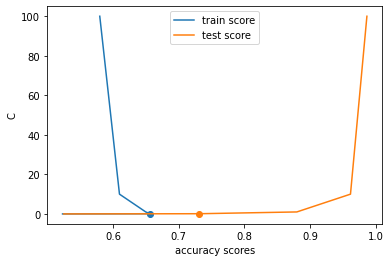

In [92]:
#chart to show out test and train score
C=[0.001,0.1,1,10,100]
means = grid4.cv_results_['mean_test_score']
for i in C:
    if i==grid4.best_params_['lsvr__C']:
        ind=C.index(i)

plt.plot(means,C,label="train score")
plt.plot(train4,C,label="test score")
plt.scatter(means[ind],C[ind])
plt.scatter(train4[ind],C[ind])
plt.xlabel("accuracy scores")
plt.ylabel("C")
plt.legend(loc="best")
plt.show()

# Linear SVC Kernel - PCA

In [93]:
#Linear SVC Kernel using PCA
clf6 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("lsvrk", SVC(kernel='linear'))
    ])
parameters2={"lsvrk__C":[0.001,0.1,1,10,100]}
grid5=GridSearchCV(clf6,parameters2,cv=3,return_train_score=True)
grid5.fit(X_train,y_train)
train5=grid5.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid5.best_params_))
print("Train score: {}".format(train5.mean()))
print("Test score: {}".format(grid5.score(X_test,y_test)))

Best Parameters: {'lsvrk__C': 1}
Train score: 0.7786666666666667
Test score: 0.73


In [94]:
#Predict and fit for lineasr kernel svm
lsvrk = LinearSVC(C=1)
lsvrk.fit(X_train_pca, y_train)
y_pred_lsvrk = lsvrk.predict(X_test_pca)
lsvrk_train_score = round(lsvrk.score(X_train_pca,y_train),4)
lsvrk_test_score = round(lsvrk.score(X_test_pca,y_test),4)
print('Train score on best parameters',lsvrk_train_score)
print('Test score on best parameters',lsvrk_test_score)

Train score on best parameters 0.8333
Test score on best parameters 0.73


In [95]:
#printing our the classification report
print(classification_report(y_pred = y_pred_lsvrk, y_true = y_test))

              precision    recall  f1-score   support

           1       0.77      0.96      0.86        57
           2       0.57      0.36      0.44        11
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       1.00      0.25      0.40         4
           6       0.50      0.33      0.40         3
           9       1.00      0.75      0.86         4
          10       0.75      0.75      0.75        12
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.73       100
   macro avg       0.42      0.31      0.34       100
weighted avg       0.69      0.73      0.69       100



In [96]:
#predicting the target values for test dataset - lsvrk
count_lsvrk = lsvrk.predict(data2_test_class)
print(count_lsvrk)

[ 1  3  1  1 10  1  1  1  4  2  2  1  1  1  1  1  1  1  1  2  1  4  1  2
  1 10  2  5  1  2  1  4  1  1 10  1  1  1  2  1  1 10  1  2  1  1  1  2
  2  1  1  1]


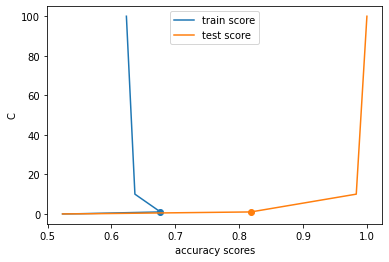

In [97]:
#graph for train and test
C=[0.001,0.1,1,10,100]
means = grid5.cv_results_['mean_test_score']
for i in C:
    if i==grid5.best_params_['lsvrk__C']:
        ind=C.index(i)

plt.plot(means,C,label="train score")
plt.plot(train5,C,label="test score")
plt.scatter(means[ind],C[ind])
plt.scatter(train5[ind],C[ind])
plt.xlabel("accuracy scores")
plt.ylabel("C")
plt.legend(loc="best")
plt.show()

# RBF Kernel - PCA

In [98]:
#rbf kernel using PCA
clf7 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("rsvrk", SVC(kernel='rbf',C=100,gamma=1))
    ])
parameters2={"rsvrk__C":[0.001,0.01,1]}
grid6=GridSearchCV(clf7,parameters2,cv=3,return_train_score=True)
grid6.fit(X_train,y_train)
train6=grid6.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid6.best_params_))
print("Train score: {}".format(train6.mean()))
print("Test score: {}".format(grid6.score(X_test,y_test)))

Best Parameters: {'rsvrk__C': 1}
Train score: 0.6477777777777778
Test score: 0.58


In [99]:
#fit and predict for rbf kernel svm
rsvrk = SVC(kernel='rbf',C=1)
rsvrk.fit(X_train_pca, y_train)
y_pred_rsvrk = rsvrk.predict(X_test_pca)
rsvrk_train_score = round(rsvrk.score(X_train_pca,y_train),4)
rsvrk_test_score = round(rsvrk.score(X_test_pca,y_test),4)
print('Train score on best parameters',rsvrk_train_score)
print('Test score on best parameters',rsvrk_test_score)

Train score on best parameters 0.7967
Test score on best parameters 0.65


In [100]:
#printing out the classification report
print(classification_report(y_pred = y_pred_rsvrk, y_true = y_test))

              precision    recall  f1-score   support

           1       0.64      0.98      0.77        57
           2       0.60      0.27      0.37        11
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           9       1.00      0.25      0.40         4
          10       0.80      0.33      0.47        12
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.65       100
   macro avg       0.37      0.21      0.24       100
weighted avg       0.58      0.65      0.57       100



In [101]:
#predicting the target values for test dataset - rsvrk
count_rsvrk = rsvrk.predict(data2_test_class)
print(count_rsvrk)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 2 1 1 2 1 1 1 1 4 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1]


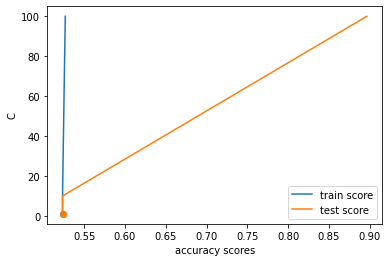

In [102]:
#graph for train and test
C=[1,10,100]
means = grid6.cv_results_['mean_test_score']
for i in C:
    if i==grid6.best_params_['rsvrk__C']:
        ind=C.index(i)

plt.plot(means,C,label="train score")
plt.plot(train6,C,label="test score")
plt.scatter(means[ind],C[ind])
plt.scatter(train6[ind],C[ind])
plt.xlabel("accuracy scores")
plt.ylabel("C")
plt.legend(loc="best")
plt.show()

# Poly Kernel - PCA

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
#Poly Kernel SVM using PCA
clf8 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("psvrk", SVC(kernel='poly',C=100,degree=1))
    ])
parameters2={"psvrk__C":[0.001,0.1,10,1,100],"psvrk__degree":[1,2,3]}
grid7=GridSearchCV(clf8,parameters2,cv=3,return_train_score=True)
grid7.fit(X_train,y_train)
train7=grid7.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid7.best_params_))
print("Train score: {}".format(train7.mean()))
print("Test score: {}".format(grid7.score(X_test,y_test)))

Best Parameters: {'psvrk__C': 10, 'psvrk__degree': 1}
Train score: 0.7565555555555555
Test score: 0.68


In [78]:
#fit and predict
psvrk = SVC(kernel='poly',C=10)
psvrk.fit(X_train_pca, y_train)
y_pred_psvrk = psvrk.predict(X_test_pca)
psvrk_train_score = round(psvrk.score(X_train_pca,y_train),4)
psvrk_test_score = round(psvrk.score(X_test_pca,y_test),4)
print('Train score on best parameters',psvrk_train_score)
print('Test score on best parameters',psvrk_test_score)

Train score on best parameters 0.96
Test score on best parameters 0.71


In [105]:
#print the classification report
print(classification_report(y_pred = y_pred_psvrk, y_true = y_test))

              precision    recall  f1-score   support

           1       0.71      0.96      0.81        57
           2       1.00      0.36      0.53        11
           3       0.50      0.50      0.50         2
           4       0.00      0.00      0.00         1
           5       1.00      0.25      0.40         4
           6       0.33      0.33      0.33         3
           8       0.00      0.00      0.00         0
           9       1.00      0.75      0.86         4
          10       0.86      0.50      0.63        12
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.71       100
   macro avg       0.45      0.31      0.34       100
weighted avg       0.71      0.71      0.67       100



In [83]:
#predicting the target values for test dataset - psvrk
count_psvrk = psvrk.predict(data2_test_class)
print(count_psvrk)

[1 3 1 1 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 4 1 3 1 1 2 1 1 1]


Here we are checking the "Macro Average Precision" for all the models that we have run from the beginning. We see that models do not perform much well, but among all poly kernel SVM works better than any other model for precision. Hence we are choosing this model and printing it to the output values as shown below

### Finally reading the predicted values into the test dataset

In [84]:
#future purpose to read the predicted values into the dataset
test_predicted = data2.copy() 

In [85]:
test_predicted

age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
Unnamed: 0                                                                   
9            50  1.0     167      67           89  130.000000          383   
25           44  1.0     169      80          109  128.000000          382   
31           58  1.0     163      68           71  136.000000          339   
32           50  1.0     160      73           75  125.000000          353   
39           45  1.0     175      80           94  163.000000          401   
47           30  1.0     158      57           73  137.000000          369   
70           37  1.0     155      60           76  166.000000          384   
72           31  1.0     161      73           93  173.000000          361   
87           40  1.0     162      65          114  191.000000          383   
88           68  1.0     161      70          170  192.000000          419   
99           36  1.0     160      70           78  118.000000          241   
115          39  1.0     160      45           75  163.000000          418   
117          28  1.0     159      56           96  153.000000          340   
127          61  1.0     185      95           95  197.000000          340   
147          34  1.0     155      54           86  127.000000          369   
151          32  1.0     173      75          111  171.000000          347   
163          24  1.0     176      72           92  153.000000          336   
165          25  1.0     162      48           74  115.000000          377   
172          32  1.0     163      65          100  145.000000          377   
174          55  1.0     156      78           88  158.102041          380   
177          27  1.0     155      55           77  205.000000          345   
185          61  1.0     170      78           84  178.000000          340   
192          65  1.0     180      79           87  137.000000          392   
193          36  1.0     172      81           87  145.000000          347   
195          27  1.0     155      45           73  156.000000          332   
197          46  1.0     168      60          100  185.000000          413   
202          50  1.0     159      70           86  168.000000          310   
211          18  1.0     180      63           93  160.000000          321   
242          46  1.0     177      85           98  177.000000          407   
243          49  1.0     166      87           78  158.102041          322   
244          72  1.0     165      68           93  177.000000          353   
251          58  1.0     175      78           95  145.000000          376   
265          35  1.0     155      55           78  157.000000          334   
277          58  1.0     150      78           86  147.000000          362   
285          65  1.0     175      65           85  161.000000          373   
288          57  1.0     175      70           94  148.000000          382   
292          40  1.0     178      76          101  165.000000          355   
314          64  1.0     167      72           85  154.000000          352   
323          54  1.0     164      83          107  182.000000          359   
333          37  1.0     175      88          105  152.000000          354   
335          47  1.0     160      65           84  150.000000          379   
337          33  1.0     165      58           76  130.000000          333   
338          39  1.0     160      70           87  160.000000          357   
359          54  1.0     160      70           98  169.000000          290   
396          45  1.0     158      65           82  122.000000          336   
398          47  1.0     175      94          108  173.000000          341   
404          62  1.0     165      70           73  177.000000          381   
412          41  1.0     170      67           96  191.000000          368   
420          58  1.0     160      90           82  158.102041          284   
423          51  1.0     186      

In [86]:
test_predicted['Class'] = count_psvrk

In [82]:
test_predicted

age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
Unnamed: 0                                                                   
9            50  1.0     167      67           89  130.000000          383   
25           44  1.0     169      80          109  128.000000          382   
31           58  1.0     163      68           71  136.000000          339   
32           50  1.0     160      73           75  125.000000          353   
39           45  1.0     175      80           94  163.000000          401   
47           30  1.0     158      57           73  137.000000          369   
70           37  1.0     155      60           76  166.000000          384   
72           31  1.0     161      73           93  173.000000          361   
87           40  1.0     162      65          114  191.000000          383   
88           68  1.0     161      70          170  192.000000          419   
99           36  1.0     160      70           78  118.000000          241   
115          39  1.0     160      45           75  163.000000          418   
117          28  1.0     159      56           96  153.000000          340   
127          61  1.0     185      95           95  197.000000          340   
147          34  1.0     155      54           86  127.000000          369   
151          32  1.0     173      75          111  171.000000          347   
163          24  1.0     176      72           92  153.000000          336   
165          25  1.0     162      48           74  115.000000          377   
172          32  1.0     163      65          100  145.000000          377   
174          55  1.0     156      78           88  158.102041          380   
177          27  1.0     155      55           77  205.000000          345   
185          61  1.0     170      78           84  178.000000          340   
192          65  1.0     180      79           87  137.000000          392   
193          36  1.0     172      81           87  145.000000          347   
195          27  1.0     155      45           73  156.000000          332   
197          46  1.0     168      60          100  185.000000          413   
202          50  1.0     159      70           86  168.000000          310   
211          18  1.0     180      63           93  160.000000          321   
242          46  1.0     177      85           98  177.000000          407   
243          49  1.0     166      87           78  158.102041          322   
244          72  1.0     165      68           93  177.000000          353   
251          58  1.0     175      78           95  145.000000          376   
265          35  1.0     155      55           78  157.000000          334   
277          58  1.0     150      78           86  147.000000          362   
285          65  1.0     175      65           85  161.000000          373   
288          57  1.0     175      70           94  148.000000          382   
292          40  1.0     178      76          101  165.000000          355   
314          64  1.0     167      72           85  154.000000          352   
323          54  1.0     164      83          107  182.000000          359   
333          37  1.0     175      88          105  152.000000          354   
335          47  1.0     160      65           84  150.000000          379   
337          33  1.0     165      58           76  130.000000          333   
338          39  1.0     160      70           87  160.000000          357   
359          54  1.0     160      70           98  169.000000          290   
396          45  1.0     158      65           82  122.000000          336   
398          47  1.0     175      94          108  173.000000          341   
404          62  1.0     165      70           73  177.000000          381   
412          41  1.0     170      67           96  191.000000          368   
420          58  1.0     160      90           82  158.102041          284   
423          51  1.0     186      

In [111]:
#test_predicted.to_csv('test_final_predicted.csv')

# Grading

In [88]:
import numpy as np
from sklearn.metrics import precision_score

test_true_values = np.array([10, 16,  1,  1,  6,  1,  6,  1,  4,  9,  1,  1,  1, 10,  1,  1,  1,
        1,  1, 15,  1,  4,  2,  2,  1, 16,  1,  1,  1, 15,  1,  4,  1,  2,
        3,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  3,  1, 16, 15,  1,  1,
        1])

precision_score(test_true_values, count_psvrk, average='macro')

0.335016835016835